## BMIS-2542: Data Programming Essentials with Python 
##### Katz Graduate School of Business, Spring 2021


### Session-5: Exploratory Analysis - Visualization with matplotlib and Pandas

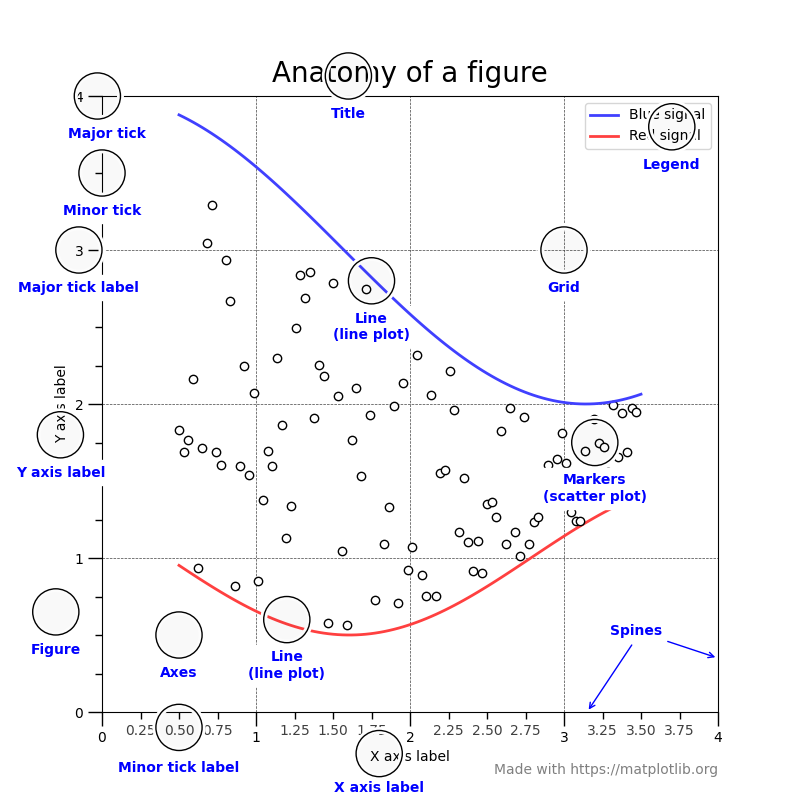

In [1]:
from IPython import display 
display.Image("https://matplotlib.org/3.3.3/_images/sphx_glr_anatomy_001.png", width = 600, height = 600)

<div class="alert alert-info"><h4>Note</h4>In Jupyter notebooks, plots are reset after each cell is evaluated. <br>So, for complex plots, all the plotting commands need to be given in a single notebook cell.</div>

## Plotting with `matplotlib`
Let's try creating a simple plot with `matplotlib`.
 - Read `matplotlib`'s PyPlot tutorial [here](https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py).
 - The main function for plotting is [PyPlot.plot()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)
 - Find a full set of `matplotlib` tutorials [here](https://matplotlib.org/tutorials/index.html).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(7,5)) # configuration options: global figure size

import numpy as np

In [2]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

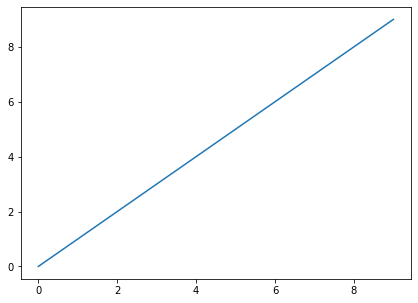

In [3]:
plt.plot(data); 

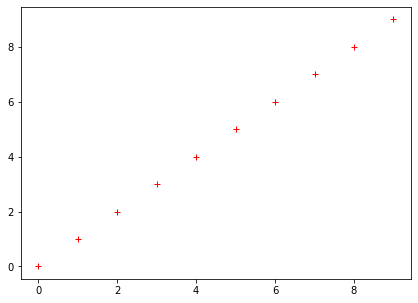

In [4]:
plt.plot(data,'r+'); # change ro to r+ and observe the output

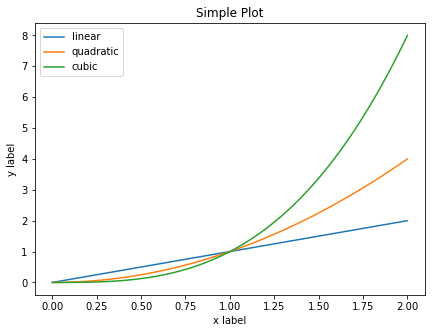

In [5]:
x = np.linspace(0, 2, 100) # get some evenly spaced numbers over a specified interval

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend();

#### Bar Chart

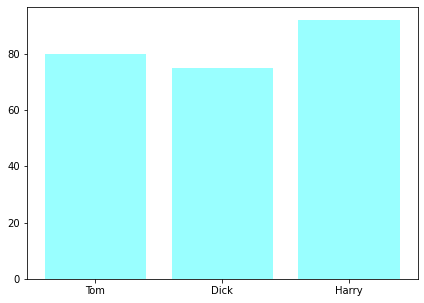

In [8]:
# bar chart
people = ['Tom', 'Dick', 'Harry']
performance = [80,75,92]

plt.bar(people, performance, align='center', alpha=0.4, color='cyan');

#### Scatter Plot

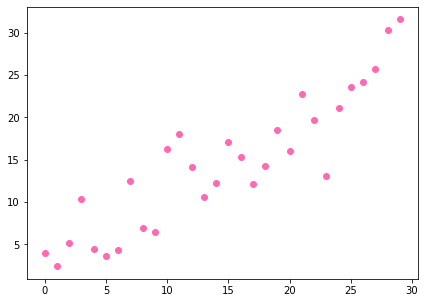

In [7]:
# scatter plot

x = np.arange(30) # get some data for the x axis
y = np.arange(30) + 3 * np.random.randn(30) # get some data for the y axis

plt.scatter(x, y, color = 'hotpink', marker='o');

### Figures and Subplots
Plots in `matplotlib` reside within a `Figure` object. <br>To plot on a figure, we need to create and add one or more **subplots** to it.

Creating a figure with a multiple subplots is a common task, so `matplotlib` provides a convenience method `plt.subplots()` that creates a new figure and returns a NumPy array containing the created subplot objects.

When number of rows and columns for the subplot grid are not provided as a parameter to `subplots()`, a single plotting area (1x1) is created inside the `figure`.

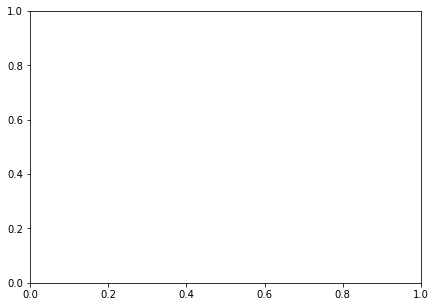

In [9]:
fig, axes = plt.subplots() # fig - points to figure; axes - points to the single plotting area inside fig

#### Plotting a line with `matplotlib`

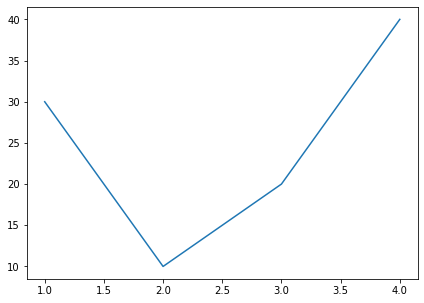

In [10]:
fig, ax = plt.subplots()
ax.plot([1,2,3,4],[30,10,20,40]); # plot a line using 4 points (1,30) (2,10) (3,20) (4,40)

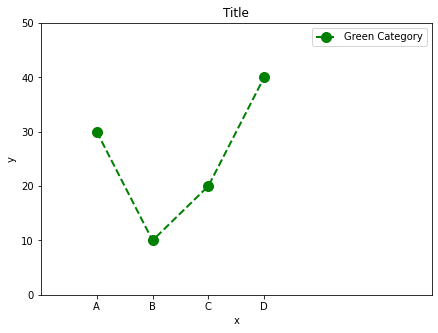

In [11]:
fig, ax = plt.subplots()
ax.plot([1,2,3,4],[30,10,20,40],color='green',marker='o',markersize=10,linestyle ='--', linewidth=2, label='Green Category')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Title')
ax.set_xlim([0,7])
ax.set_ylim([0,50])
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(['A','B','C','D'])
ax.legend();

#### Multiple Curves in the Same Plot

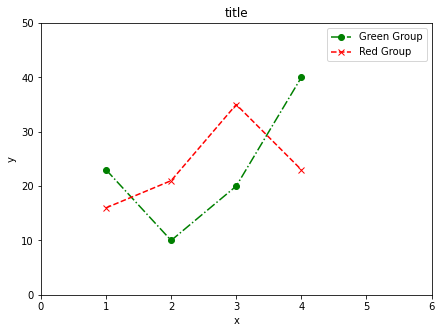

In [12]:
fig, ax = plt.subplots()
ax.plot([1,2,3,4],[23,10,20,40],color='green',marker='o',linestyle ='-.', label='Green Group')
ax.plot([1,2,3,4],[16,21,35,23],color='red',marker='x',linestyle ='--', label='Red Group')

# set axis labels, axis limits, title, legend, etc.
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title')
ax.set_xlim([0,6])
ax.set_ylim([0,50])
ax.legend();

#### Multiple Plotting Areas

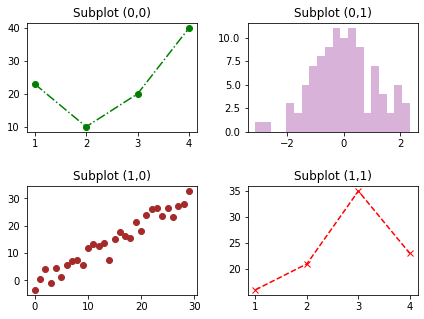

In [13]:
fig, axes = plt.subplots(2,2) # define figure with 2 by 2 plotting areas (subplots)
axes[0,0].plot([1,2,3,4],[23,10,20,40],color='green',marker='o',linestyle ='-.')
axes[0,1].hist(np.random.randn(100), bins=20, color='purple', alpha=0.3) # a scatter plot
axes[1,0].scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30),color = 'brown') # a histogram
axes[1,1].plot([1,2,3,4],[16,21,35,23],color='r',marker='x',linestyle ='--')

for i in range(2):
    for j in range(2):
        axes[i,j].set_title('Subplot ({0},{1})'.format(i,j))
        
# adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# save figure as a PNG file
plt.savefig('subplot.png', dpi = 400, bbox_inches='tight');

## Plotting with Pandas

Pandas has built-in methods that simplify creating visualizations from `DataFrame` and `Series` objects.<br>

**Learn about** [DataFrame.plot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) from the Pandas documentation.

In [14]:
import pandas as pd

In [15]:
plt.close('all') # clean memory space

### Line Plots
`Series` and `DataFrame` in Pandas each has `plot` method for making some basic plot types. <br>By default, `plot()` makes line plots.
Additional keyword arguments to `plot` are passed through to the respective `matplotlib` plotting function.

In [16]:
# Line Plot on Series
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10)) # create a series
s

0     0.030625
10    1.129016
20   -0.014838
30   -0.101773
40    0.966146
50    1.438138
60    2.266694
70    2.032153
80    1.629100
90    1.779088
dtype: float64

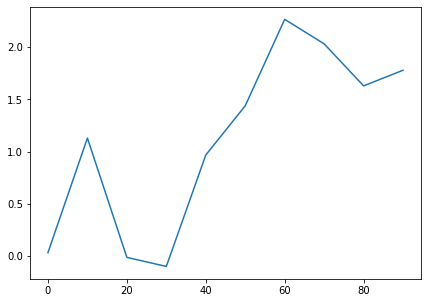

In [17]:
s.plot(); # equals to df.plot.line()

In [18]:
# a dataframe
df = pd.DataFrame(np.random.randn(10, 4),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df

,A,B,C,D
0,0.143892,0.117418,0.848377,-0.382018
10,0.327752,-0.210539,-0.005263,0.189076
20,-0.934658,-0.750009,-0.259950,0.254112
30,1.493503,-1.983449,-0.372366,0.590295
40,-1.545484,0.825887,0.225236,0.632981
50,-1.529458,-0.795046,-1.059608,1.180913
60,0.472985,-0.025388,1.213361,0.130670
70,2.670150,1.905198,-0.699539,-0.748068
80,-0.785311,0.680766,-0.305558,-0.567219
90,-0.997986,-2.257586,-0.388065,0.146877


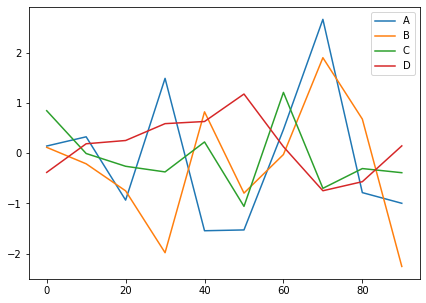

In [19]:
# line plot on DataFrame
df.plot();

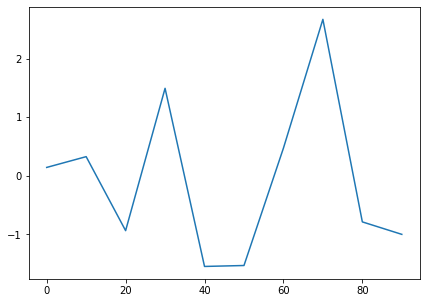

In [20]:
# plotting one column of the DataFrame (i.e., series)
df.A.plot();

In [21]:
plt.close('all')

### Bar Plots
The `plot.bar()` and `plot.barh()` make horizontal and vertical bar plots.

In [22]:
import seaborn as sns # only to get the dataset - not for visualization

# load the Tips dataset built into the seaborn module
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips.tip/(tips['total_bill'] - tips.tip) # new column for tipping percentage
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


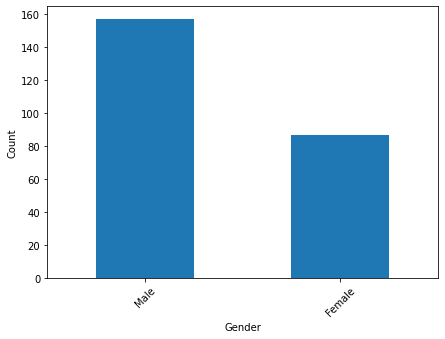

In [23]:
# a useful recipie for a series's value frequency
countByGender = tips.sex.value_counts()

fig, ax = plt.subplots()
ax.set_xlabel('Gender')
ax.set_ylabel('Count')

countByGender.plot.bar(rot = 45);

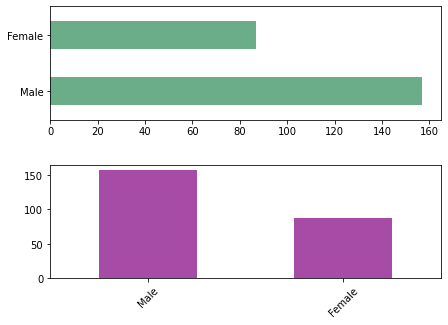

In [24]:
# bar plots
fig, axes = plt.subplots(2,1)
countByGender.plot.barh(ax= axes[0], color = 'seagreen', alpha = 0.7, rot=0) # vertical bar plot
countByGender.plot.bar(ax= axes[1], color = 'purple', alpha = 0.7, rot=45) # horizontal bar plot

# adjust the spacing between the subplots
plt.subplots_adjust(hspace=0.4)

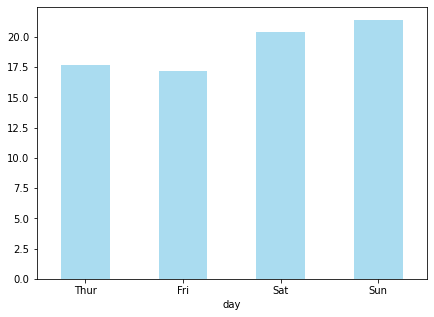

In [25]:
# Average total bill value by day - using aggregation
avgBill = tips.groupby('day').total_bill.mean()
avgBill.plot.bar(color='skyblue', rot = 0, alpha = 0.7);

In [26]:
# Average tip pecentage by day by gender - using aggregation
pivotTable = pd.pivot_table(tips, values='tip_pct',
                            index=['day'], columns=['sex'], aggfunc = np.mean)
pivotTable


sex,Male,Female
day,,
Thur,0.201558,0.188499
Fri,0.169362,0.252193
Sat,0.182245,0.191753
Sun,0.223548,0.232708


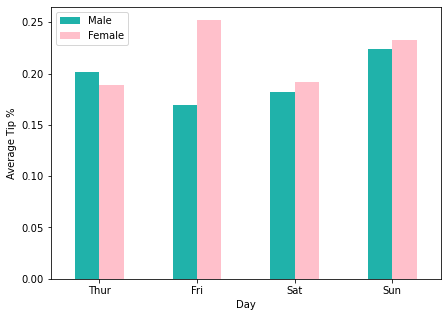

In [27]:
# dodged bar chart
pivotTable.plot.bar(rot=0, color=['lightseagreen','pink'])
plt.ylabel('Average Tip %')
plt.xlabel('Day')
plt.legend(loc=2);


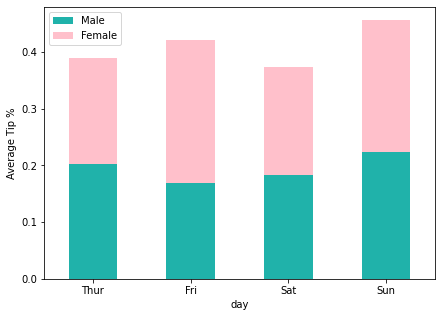

In [28]:
# stacked bar chart
pivotTable.plot.bar(stacked = True, rot=0, color=['lightseagreen','pink'])
plt.ylabel('Average Tip %')
plt.legend(loc=2);

### Pie Plots
A pie plot is a proportional representation of the numerical data in a column.

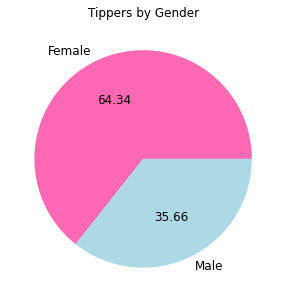

In [29]:
# pandas pie plot (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html)
tips.sex.value_counts().plot.pie(labels=['Female', 'Male'], colors=['hotpink', 'lightblue'],
                 autopct='%.2f', fontsize=12, figsize=(5, 5));
plt.title('Tippers by Gender')
plt.axis('off');

### Visualizing the Distribution of a Dataset

#### Histograms  and Density Plots
Histograms is a kind of barplot that gives a discretized display of value frequency. Data points are split into discrete, evenly spaced bins, and the number of data points in each bin is plotted.

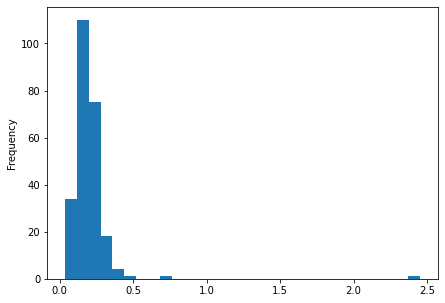

In [30]:
#histogram of tipping percentages of the total bill (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hist.html)
tips.tip_pct.plot.hist(bins=30);

A related plot is a *density plot*, which is formed by computing an estimate of a continuous probablity distribution that might have generated the observed data. 

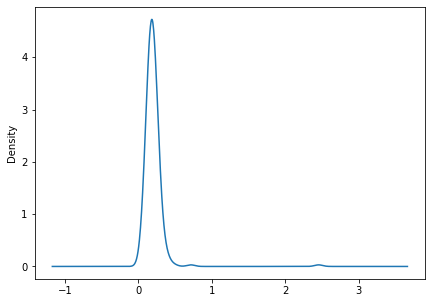

In [31]:
# Pandas density plot(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.density.html#pandas.DataFrame.plot.density)
tips.tip_pct.plot.density();

The most familiar way to visualize a bivariate distribution is a scatterplot, where each observation is shown with point at the x and y values.

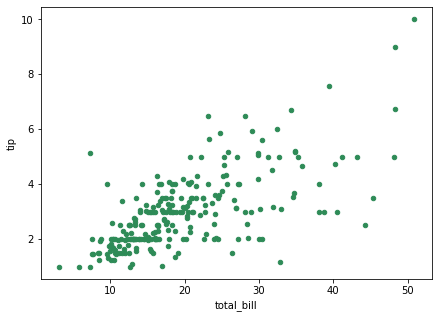

In [32]:
# scatter plot - pandas (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html#pandas.DataFrame.plot.scatter)
tips.plot.scatter(x="total_bill", y="tip", color = 'seagreen');

### Box Plots
A box plot is a method for graphically depicting groups of numerical data through their quartiles. <br>The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). <br>The whiskers extend from the edges of box to show the range of the data. <br>The position of the whiskers is set by default to 1.5 * IQR (IQR = Q3 - Q1) from the edges of the box. Outlier points are those past the end of the whiskers.

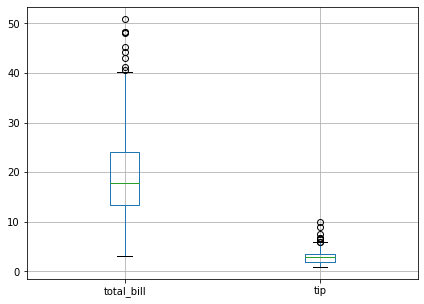

In [33]:
tips.boxplot(column=['total_bill','tip']);